In [17]:
import pandas as pd
import matplotlib.pyplot as plt

## Importacion de Datos

In [18]:
flights_per_dar = pd.read_csv('flights_all_years.csv')

In [19]:
flights_per_dar

,Year,Date,Flights
0,2025 Number of flights,2024-12-31,156956
1,2025 Number of flights,2025-01-01,205823
2,2025 Number of flights,2025-01-02,213193
3,2025 Number of flights,2025-01-03,198500
4,2025 Number of flights,2025-01-04,186594
...,...,...,...
2951,2021 7-day moving average,2025-12-26,155327
2952,2021 7-day moving average,2025-12-27,150982
2953,2021 7-day moving average,2025-12-28,145823
2954,2021 7-day moving average,2025-12-29,141828


In [20]:
flights_per_dar["Year"].value_counts()

2024 Number of flights       366
2024 7-day moving average    366
2023 Number of flights       365
2023 7-day moving average    365
2022 Number of flights       365
2022 7-day moving average    365
2021 Number of flights       365
2021 7-day moving average    365
2025 Number of flights        17
2025 7-day moving average     17
Name: Year, dtype: int64

## Limpieza De Datos

In [21]:
number_flights = flights_per_dar[flights_per_dar["Year"].str.contains("Number of flights")]
moving_average = flights_per_dar[flights_per_dar["Year"].str.contains("7-day moving average")]

In [22]:
print(number_flights)
print(moving_average)

                        Year        Date  Flights
0     2025 Number of flights  2024-12-31   156956
1     2025 Number of flights  2025-01-01   205823
2     2025 Number of flights  2025-01-02   213193
3     2025 Number of flights  2025-01-03   198500
4     2025 Number of flights  2025-01-04   186594
...                      ...         ...      ...
2586  2021 Number of flights  2025-12-26   153431
2587  2021 Number of flights  2025-12-27   152950
2588  2021 Number of flights  2025-12-28   151841
2589  2021 Number of flights  2025-12-29   151570
2590  2021 Number of flights  2025-12-30   139359

[1478 rows x 3 columns]
                           Year        Date  Flights
17    2025 7-day moving average  2024-12-31   180986
18    2025 7-day moving average  2025-01-01   184638
19    2025 7-day moving average  2025-01-02   186606
20    2025 7-day moving average  2025-01-03   189042
21    2025 7-day moving average  2025-01-04   190868
...                         ...         ...      ...
2951

In [23]:
#number_flights["Year"] = number_flights["Year"].str[:4]

In [24]:
#number_flights['Year'] = pd.to_numeric(number_flights['Year'], errors='coerce')

In [25]:
#def generate_dates(row):
#    year = int(row['Year'])
#    start_date = pd.Timestamp(f"{year}-01-01")  # Fecha de inicio del año
 #   days_offset = row.name % 365  # Calcular el desplazamiento de días
 #   return start_date + pd.Timedelta(days=days_offset)

# Crear una nueva columna 'Date' con las fechas generadas
#number_flights['Periodo'] = number_flights.apply(generate_dates, axis=1)

In [26]:
number_flights.to_csv('flights_per_day.csv', index=False)

In [27]:
number_flights['Year'] = number_flights['Year'].str.extract(r'(\d{4})').astype(int)
moving_average['Year'] = moving_average['Year'].str.extract(r'(\d{4})').astype(int)

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
number_flights["Date"] = pd.to_datetime(number_flights["Date"])
moving_average["Date"] = pd.to_datetime(moving_average["Date"])

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Exploracion de Datos

#### Resumen semanal

In [29]:
annual_summary_number = number_flights.groupby('Year')['Flights'].agg(['sum', 'mean', 'min', 'max'])
annual_summary_moving = moving_average.groupby('Year')['Flights'].agg(['sum', 'mean', 'min', 'max'])

print(annual_summary_number)
print(annual_summary_moving)


           sum           mean     min     max
Year                                         
2021  63284096  173381.084932   93897  228148
2022  70744552  193820.690411  102872  242662
2023  77183719  211462.243836  120886  262103
2024  80437687  219775.101093  128990  275690
2025   3459912  203524.235294  156956  235646
           sum           mean     min     max
Year                                         
2021  63238116  173255.112329  119406  206280
2022  70709422  193724.443836  143583  224751
2023  77140505  211343.849315  156201  245728
2024  80406823  219690.773224  169759  257254
2025   3335391  196199.470588  180986  214423


## Visualizacion

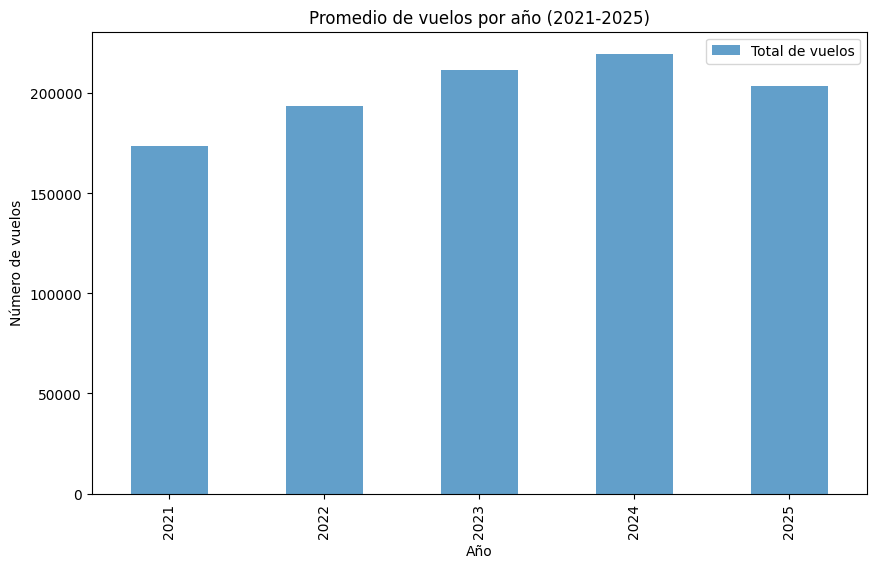

In [33]:
plt.figure(figsize=(10, 6))
annual_summary_number['mean'].plot(kind='bar', alpha=0.7, label="Total de vuelos")
plt.title("Promedio de vuelos por año (2021-2025)")
plt.xlabel("Año")
plt.ylabel("Número de vuelos")
plt.legend()
plt.show()

La gráfica muestra el promedio de vuelos por año entre 2021 y 2025, con un aumento progresivo desde 2021 hasta 2024. El eje X representa los años y el eje Y el promedio del número de vuelos, que se sitúa entre 150,000 y 225,000. El año 2024 destaca como el de mayor promedio de vuelos en este período, reflejando un crecimiento constante en la actividad aérea.

En 2025, sin embargo, se observa una leve disminución en comparación con 2024, aunque el promedio sigue siendo alto. Este cambio podría indicar una estabilización o corrección en la tendencia, influenciada por factores como la demanda del sector, condiciones económicas o restricciones de viaje.

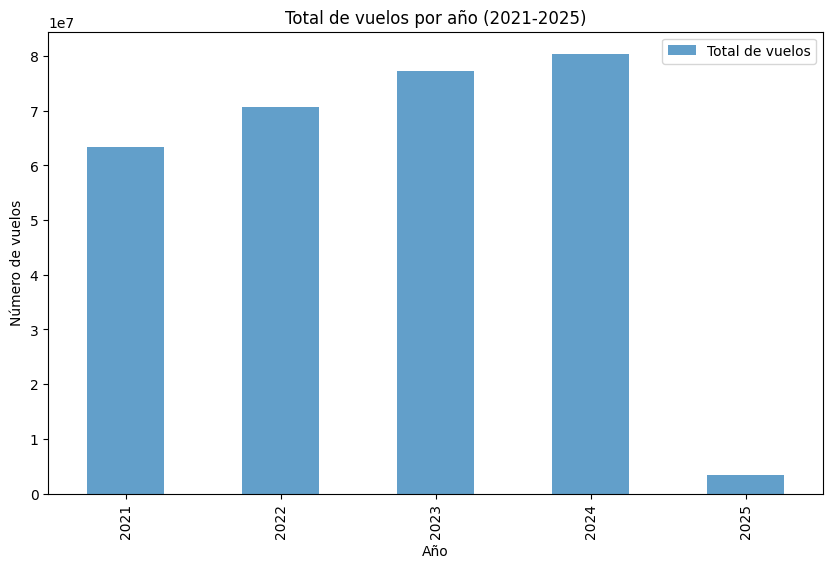

In [31]:
plt.figure(figsize=(10, 6))
annual_summary_number['sum'].plot(kind='bar', alpha=0.7, label="Total de vuelos")
plt.title("Total de vuelos por año (2021-2025)")
plt.xlabel("Año")
plt.ylabel("Número de vuelos")
plt.legend()
plt.show()

El comportamiento de los datos indica un fuerte crecimiento de la actividad aérea entre 2021 y 2024, lo que podría estar relacionado con una recuperación o expansión del sector. Sin embargo, la significativa caída en 2025 prodria sugerir un evento o factor disruptivo que impactó considerablemente la operación de vuelos en ese año, pero hay que contar que es en el conecto de principios de enero del 2025 el analisis

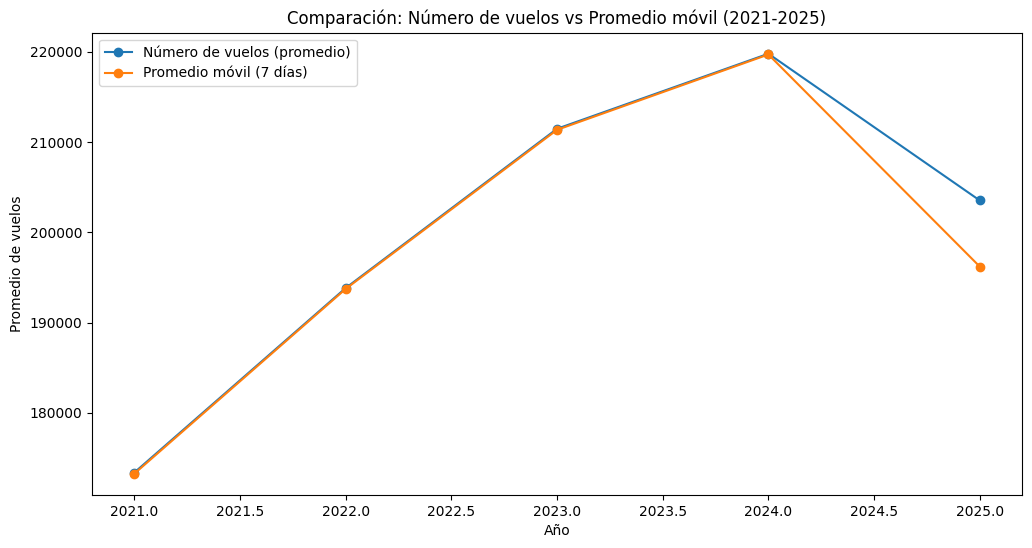

In [32]:
plt.figure(figsize=(12, 6))
number_flights.groupby('Year')['Flights'].mean().plot(label='Número de vuelos (promedio)', marker='o')
moving_average.groupby('Year')['Flights'].mean().plot(label='Promedio móvil (7 días)', marker='o')
plt.title("Comparación: Número de vuelos vs Promedio móvil (2021-2025)")
plt.xlabel("Año")
plt.ylabel("Promedio de vuelos")
plt.legend()
plt.show()


A partir de este año, ambas curvas muestran una marcada disminución en 2025. Aunque el promedio móvil de 7 días sigue de cerca la tendencia del promedio general, destaca una mayor suavidad en las transiciones debido al método de cálculo. Esta representación refleja un crecimiento constante de los vuelos hasta 2024, seguido de una drástica caída en 2025, posiblemente causada por un evento disruptivo o un cambio significativo en el sector aéreo.